Đang xử lý bộ dữ liệu: ../data/1_ThreeProvinces.csv
Số thành phố: 3
Đường đi tối ưu: [1, 3, 2, 1]
Độ dài đường đi tối ưu tìm được: 209.51
Thời gian chạy (s): 0.17


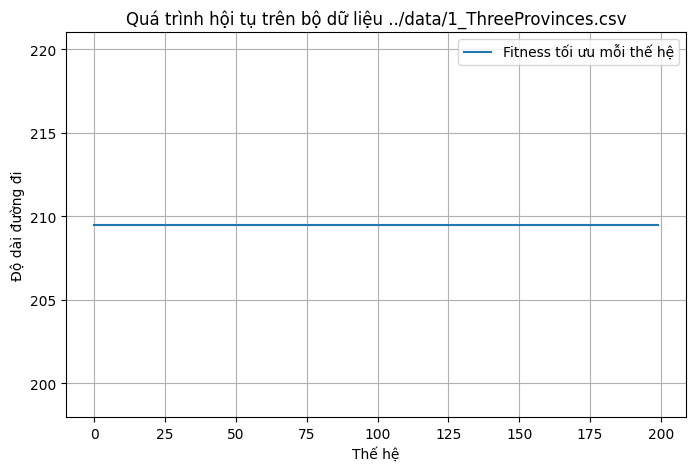

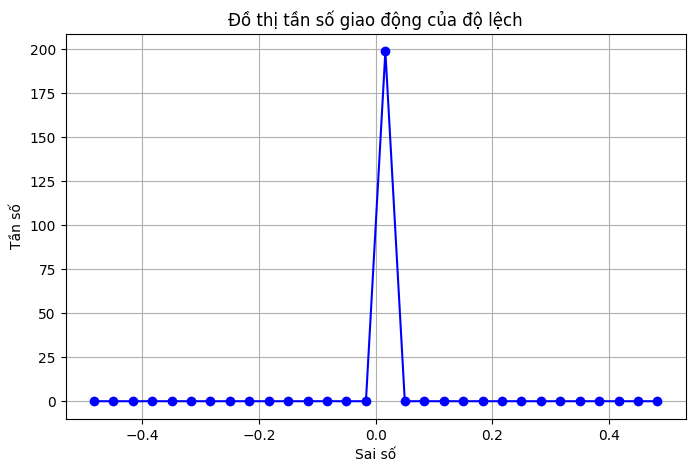

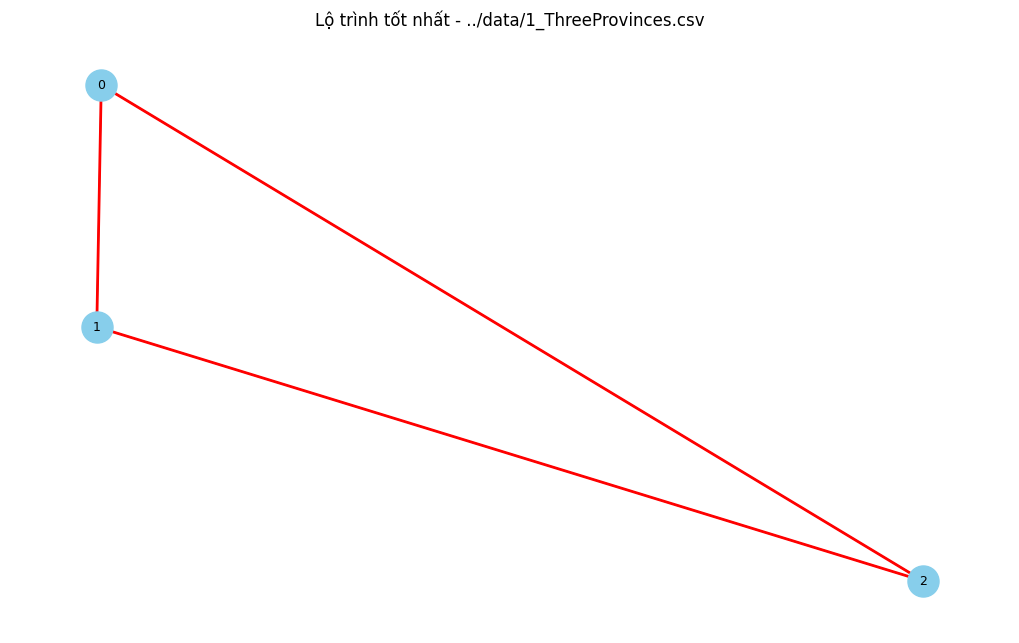

Đang xử lý bộ dữ liệu: ../data/2_SouthEast.csv
Số thành phố: 6
Đường đi tối ưu: [1, 6, 5, 3, 2, 4, 1]
Độ dài đường đi tối ưu tìm được: 426.02
Thời gian chạy (s): 0.18


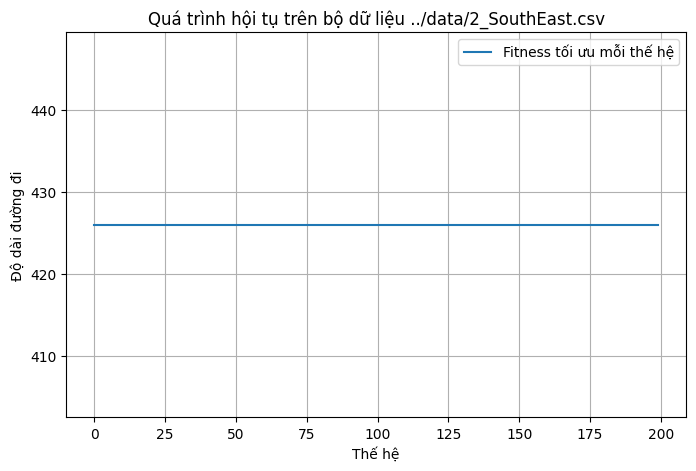

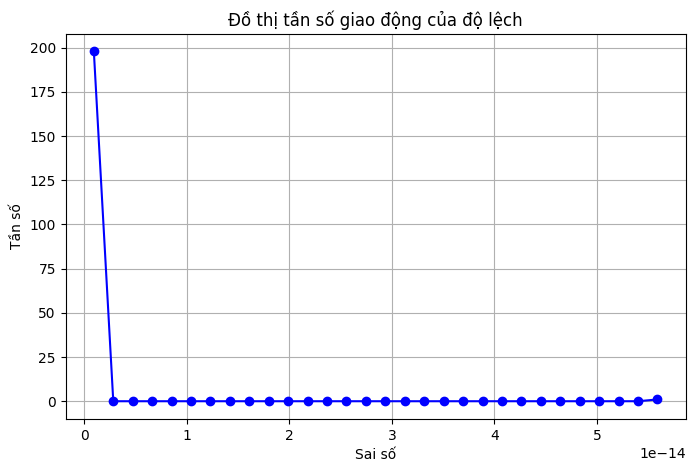

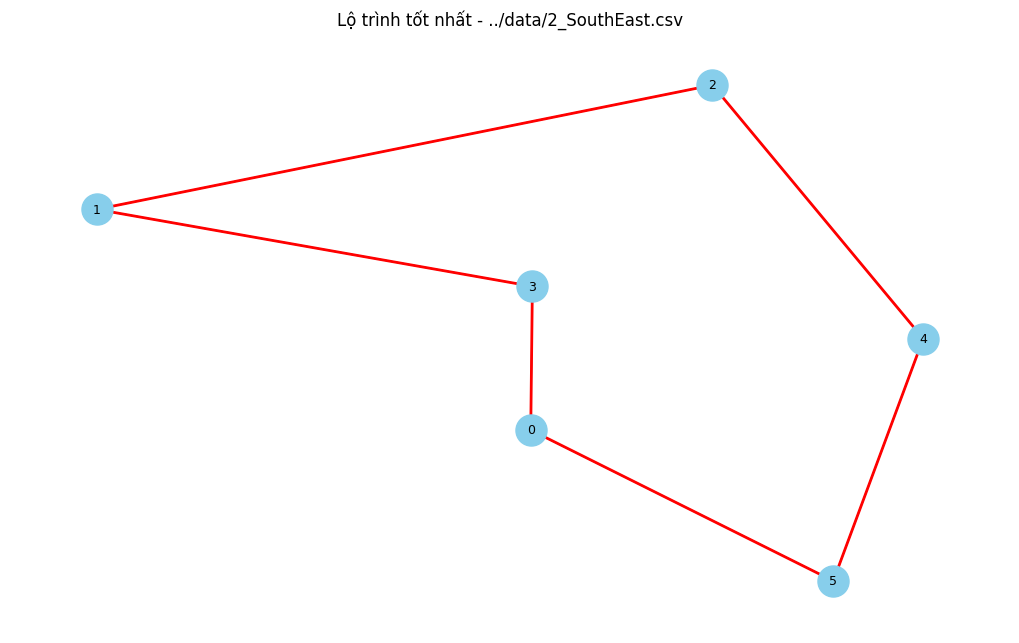

Đang xử lý bộ dữ liệu: ../data/3_MekongDelta.csv
Số thành phố: 13
Đường đi tối ưu: [1, 9, 13, 12, 11, 8, 6, 7, 10, 4, 3, 2, 5, 1]
Độ dài đường đi tối ưu tìm được: 753.52
Thời gian chạy (s): 0.31


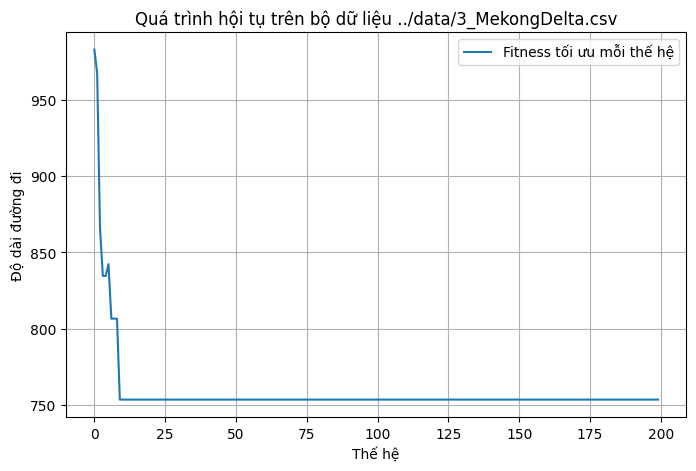

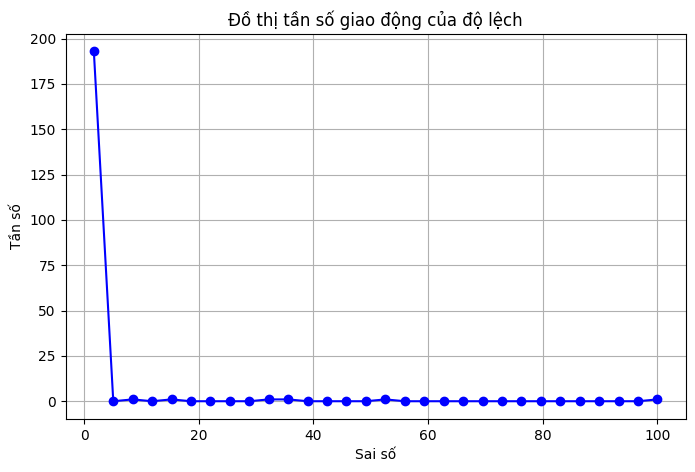

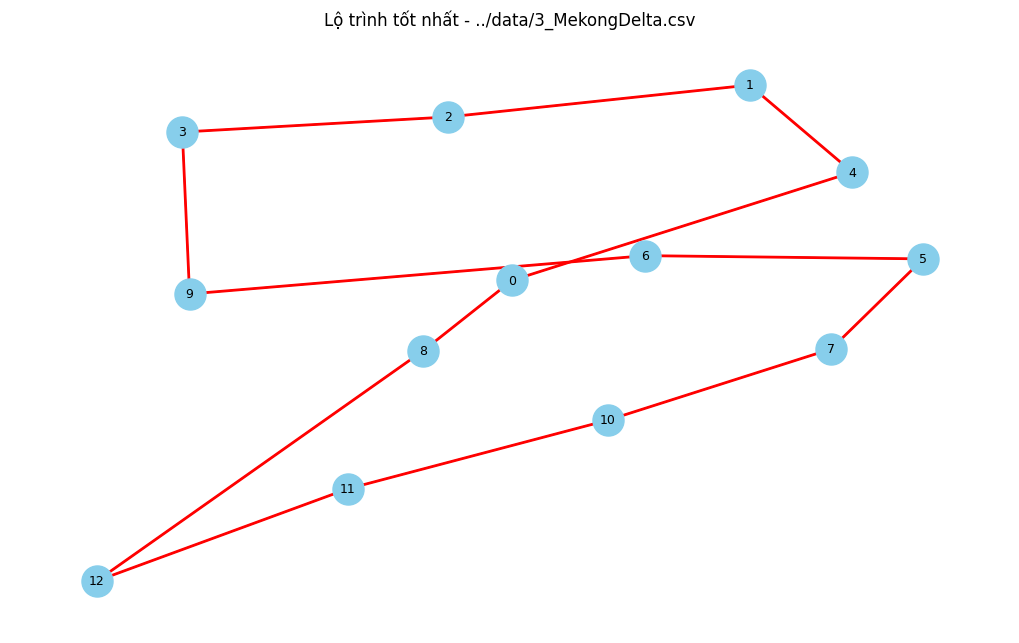

Đang xử lý bộ dữ liệu: ../data/4_SouthRegion.csv
Số thành phố: 17
Đường đi tối ưu: [1, 5, 4, 8, 7, 6, 11, 13, 14, 12, 10, 16, 15, 17, 9, 3, 2, 1]
Độ dài đường đi tối ưu tìm được: 1191.41
Thời gian chạy (s): 0.32


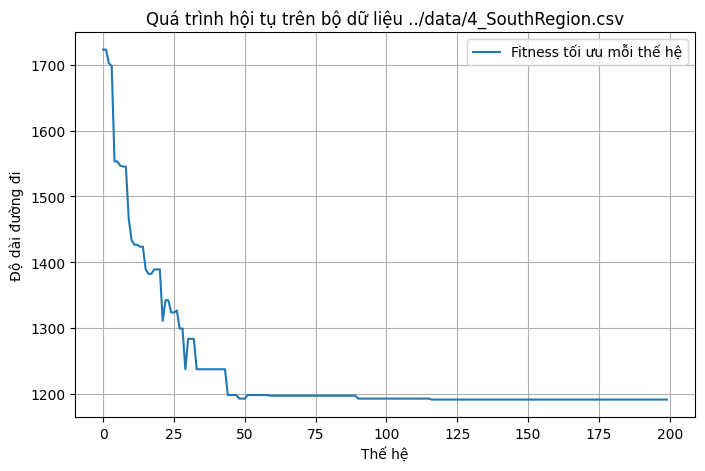

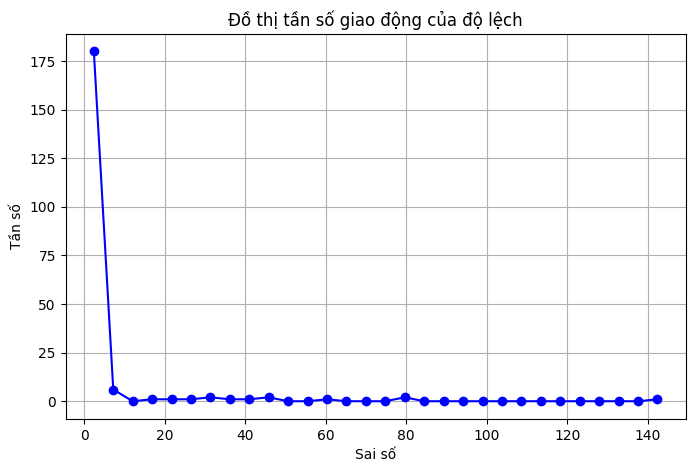

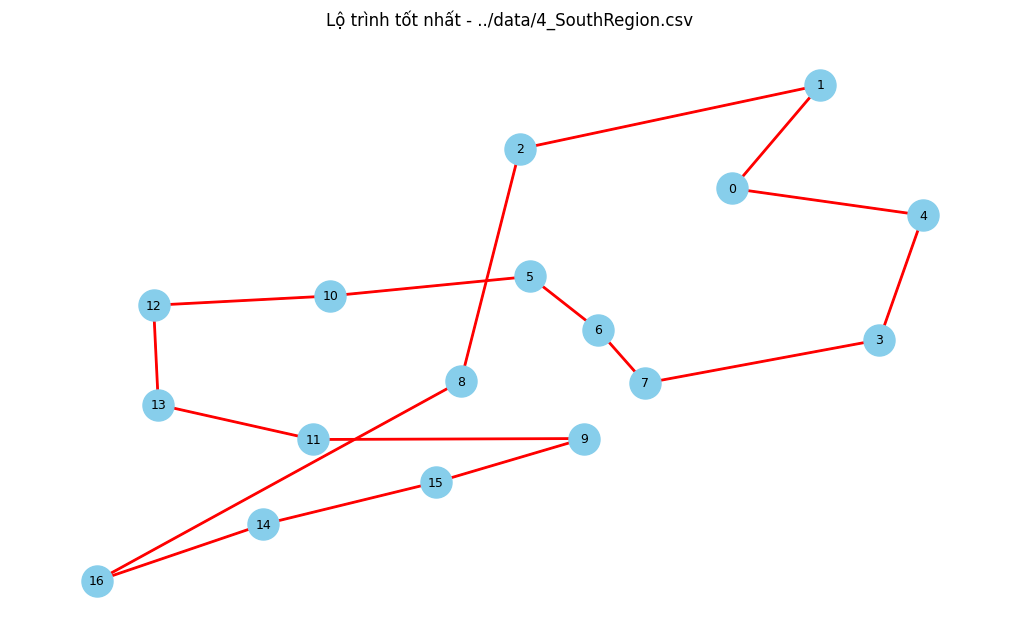

Đang xử lý bộ dữ liệu: ../data/5_CentralRegion.csv
Số thành phố: 19
Đường đi tối ưu: [1, 2, 3, 4, 5, 6, 19, 7, 14, 8, 9, 15, 16, 10, 11, 12, 13, 18, 17, 1]
Độ dài đường đi tối ưu tìm được: 2539.18
Thời gian chạy (s): 0.39


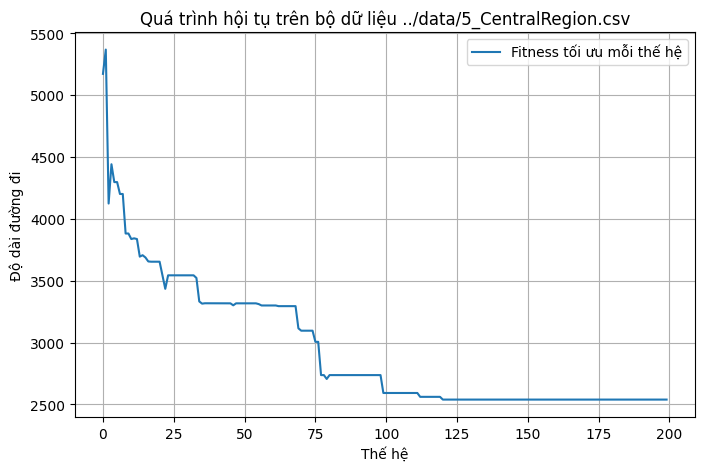

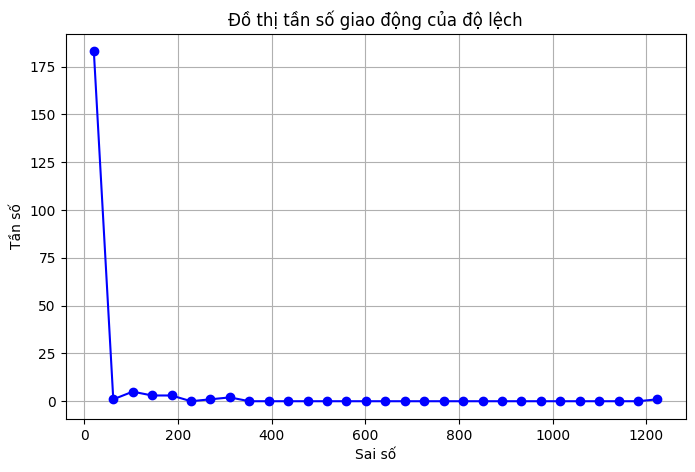

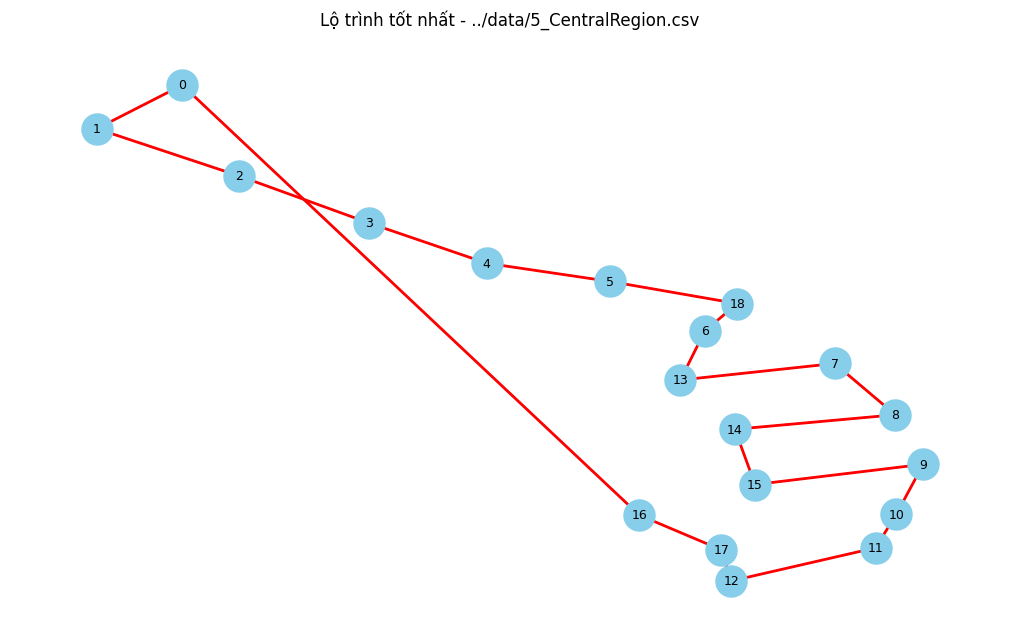

Đang xử lý bộ dữ liệu: ../data/6_NorthRegion.csv
Số thành phố: 25
Đường đi tối ưu: [1, 2, 5, 12, 7, 16, 21, 19, 18, 25, 10, 11, 13, 14, 15, 17, 23, 22, 24, 20, 9, 8, 4, 6, 3, 1]
Độ dài đường đi tối ưu tìm được: 1896.71
Thời gian chạy (s): 0.63


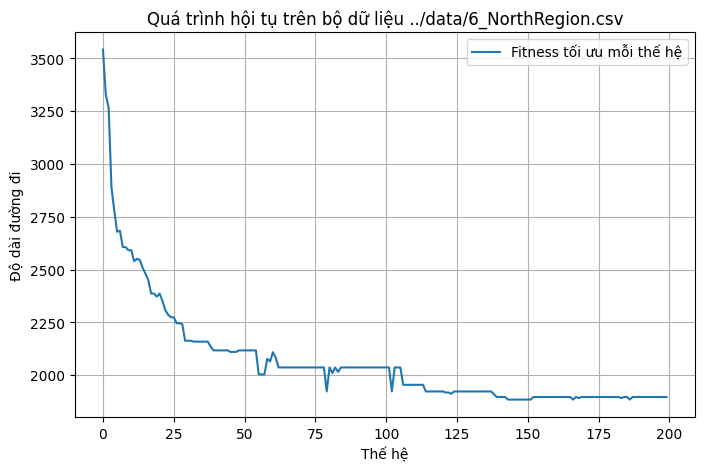

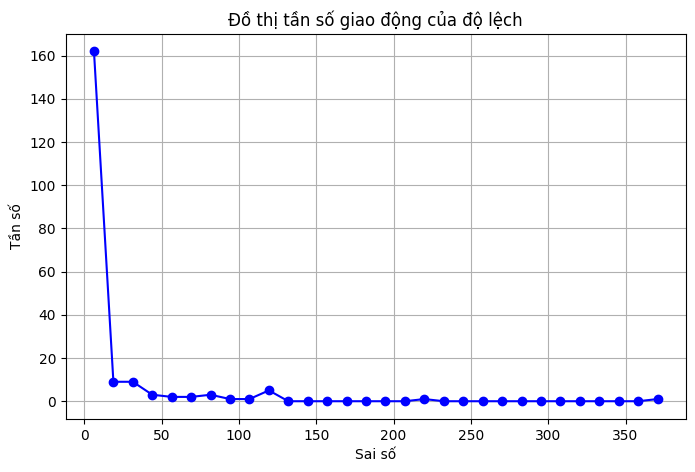

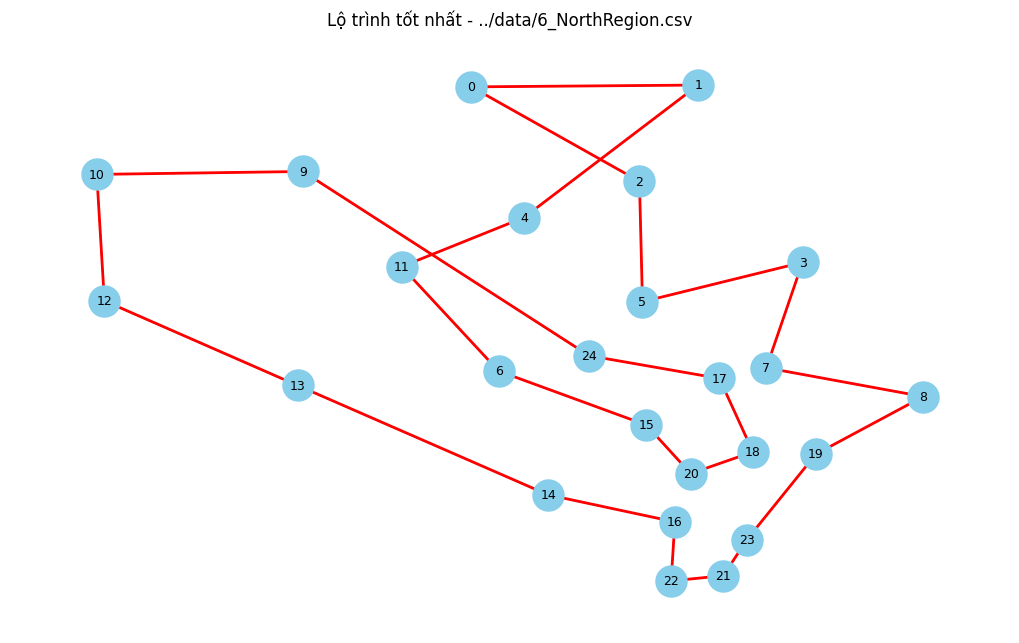

Đang xử lý bộ dữ liệu: ../data/7_SouthandCentral.csv
Số thành phố: 38
Đường đi tối ưu: [1, 3, 9, 10, 11, 12, 13, 24, 23, 25, 38, 30, 22, 20, 21, 19, 6, 8, 15, 16, 17, 18, 37, 31, 36, 34, 35, 29, 26, 27, 28, 33, 32, 14, 7, 5, 4, 2, 1]
Độ dài đường đi tối ưu tìm được: 5183.63
Thời gian chạy (s): 0.84


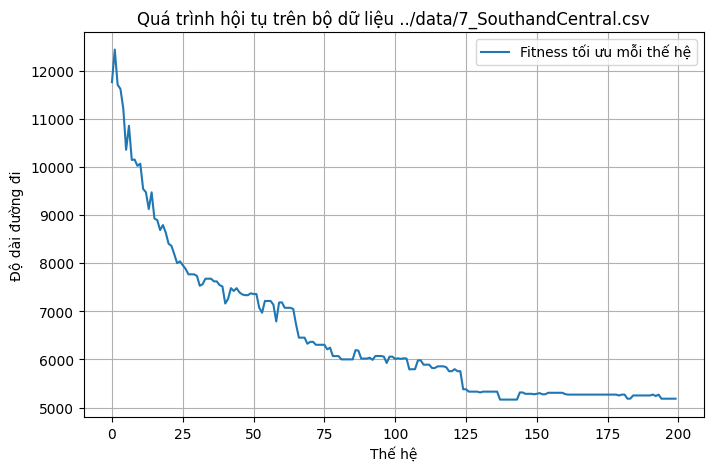

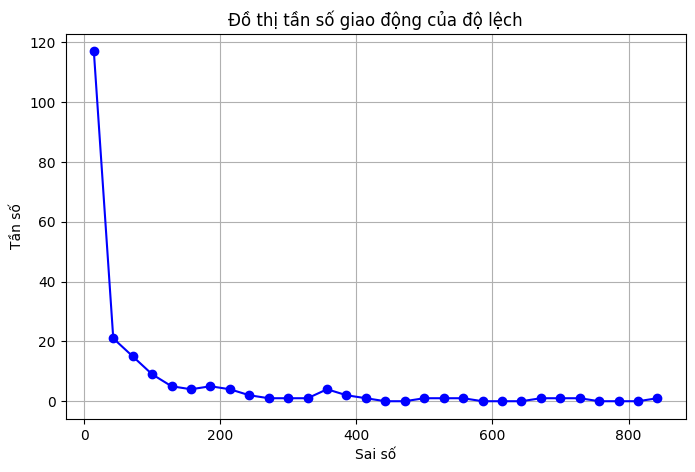

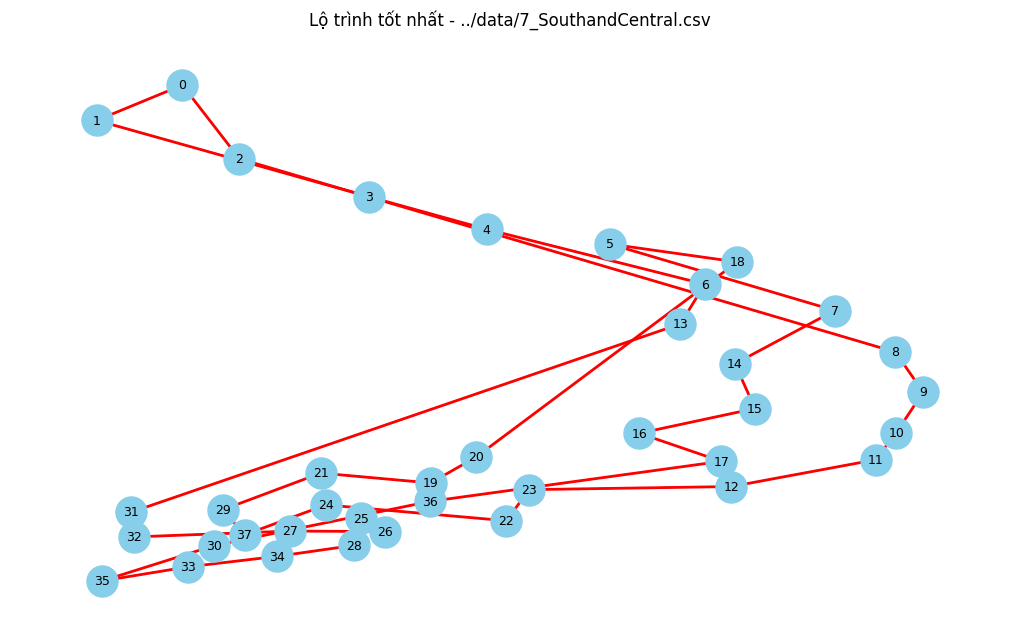

Đang xử lý bộ dữ liệu: ../data/8_VietNam.csv
Số thành phố: 63
Đường đi tối ưu: [1, 34, 50, 54, 23, 40, 15, 47, 57, 46, 41, 18, 35, 52, 63, 44, 60, 14, 37, 49, 3, 4, 62, 30, 24, 26, 6, 31, 42, 48, 45, 32, 36, 16, 8, 21, 25, 56, 38, 22, 55, 27, 43, 29, 5, 28, 51, 12, 61, 53, 9, 19, 10, 39, 7, 59, 20, 33, 13, 2, 17, 11, 58, 1]
Độ dài đường đi tối ưu tìm được: 10626.81
Thời gian chạy (s): 1.27


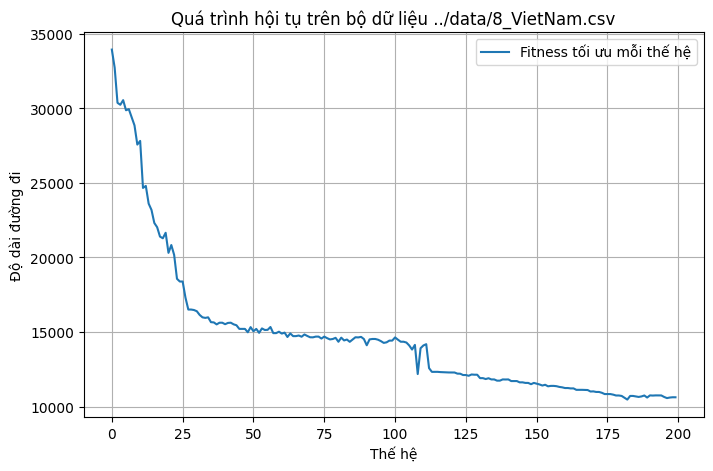

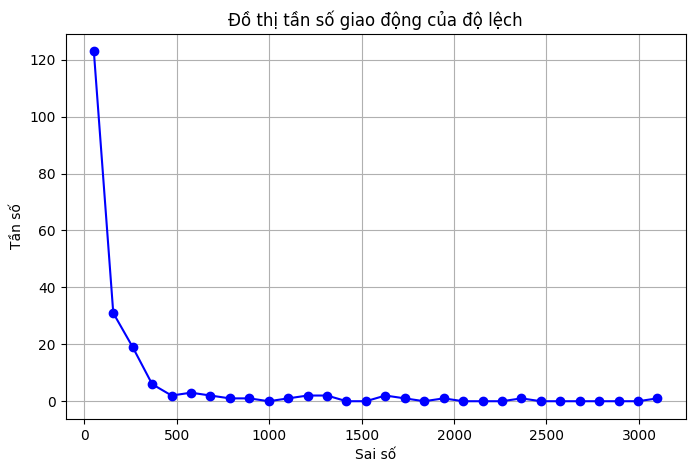

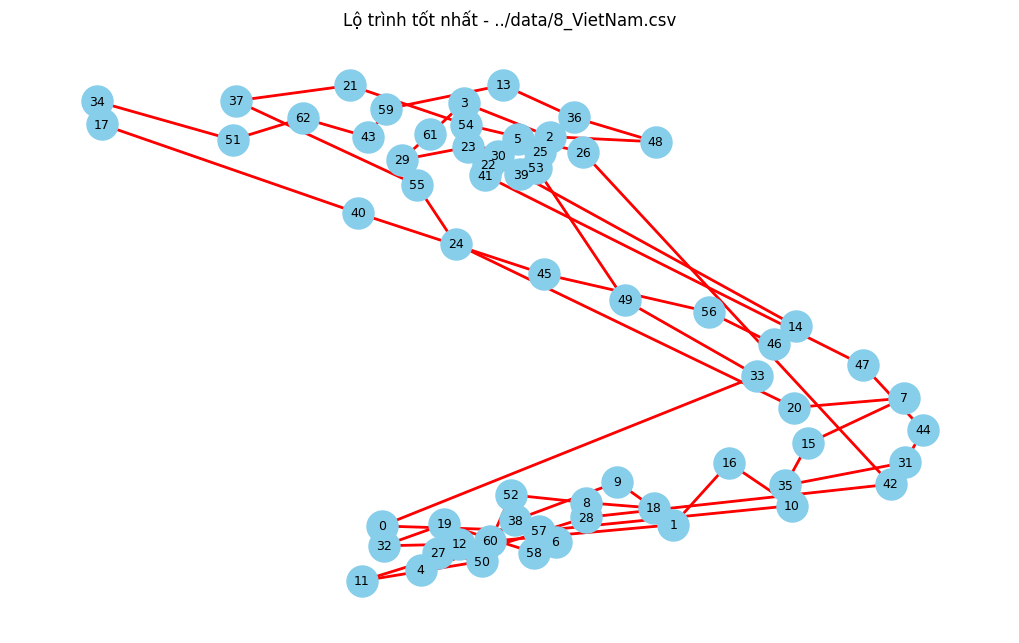


--- Tổng kết kết quả đánh giá ---
../data/1_ThreeProvinces.csv - Số thành phố: 3 - Độ dài tối ưu: 209.51 - Thời gian: 0.17s
../data/2_SouthEast.csv - Số thành phố: 6 - Độ dài tối ưu: 426.02 - Thời gian: 0.18s
../data/3_MekongDelta.csv - Số thành phố: 13 - Độ dài tối ưu: 753.52 - Thời gian: 0.31s
../data/4_SouthRegion.csv - Số thành phố: 17 - Độ dài tối ưu: 1191.41 - Thời gian: 0.32s
../data/5_CentralRegion.csv - Số thành phố: 19 - Độ dài tối ưu: 2539.18 - Thời gian: 0.39s
../data/6_NorthRegion.csv - Số thành phố: 25 - Độ dài tối ưu: 1896.71 - Thời gian: 0.63s
../data/7_SouthandCentral.csv - Số thành phố: 38 - Độ dài tối ưu: 5183.63 - Thời gian: 0.84s
../data/8_VietNam.csv - Số thành phố: 63 - Độ dài tối ưu: 10626.81 - Thời gian: 1.27s


In [1]:
import pandas as pd 
import time
import math
import numpy as np
import os
import matplotlib.pyplot as plt
from TSP import compute_distance_matrix, visualize
from GA import solve

def load_locations_from_csv(file_path):
    """
    Giả định file csv có cột 'lat' và 'lon' hoặc tương tự.
    """
    df = pd.read_csv(file_path)
    if 'lat' in df.columns and 'lon' in df.columns:
        locations = list(zip(df['lat'], df['lon']))
    elif 'latitude' in df.columns and 'longitude' in df.columns:
        locations = list(zip(df['latitude'], df['longitude']))
    else:
        raise ValueError("CSV phải có cột 'lat' và 'lon' hoặc 'latitude' và 'longitude'")
    return locations

def evaluate_ga_on_dataset(file_path,
                           population_size=100,
                           generations=200,
                           mutation_rate=0.01,
                           mutation_algorithm='swap',
                           crossover_algorithm='single_point',
                           selection_algorithm='tournament'):
    print(f"Đang xử lý bộ dữ liệu: {file_path}")

    # Load tọa độ
    locations = load_locations_from_csv(file_path)
    n_cities = len(locations)
    print(f"Số thành phố: {n_cities}")

    # Tính ma trận khoảng cách
    distance_matrix = compute_distance_matrix(locations)

    # Chạy GA
    start_time = time.time()
    distance, route, fitness_history = solve(
        problem=distance_matrix,
        population_size=population_size,
        generations=generations,
        mutation_rate=mutation_rate,
        mutation_algorithm=mutation_algorithm,
        crossover_algorithm=crossover_algorithm,
        selection_algorithm=selection_algorithm
    )
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Đường đi tối ưu:", route)
    print(f"Độ dài đường đi tối ưu tìm được: {distance:.2f}")
    print(f"Thời gian chạy (s): {elapsed_time:.2f}")

    # Vẽ đồ thị quá trình hội tụ
    plt.figure(figsize=(8, 5))
    plt.plot(fitness_history, label='Fitness tối ưu mỗi thế hệ')
    plt.xlabel('Thế hệ')
    plt.ylabel('Độ dài đường đi')
    plt.title(f'Quá trình hội tụ trên bộ dữ liệu {file_path}')
    plt.legend()
    plt.grid(True)
    plt.show()

    fitness_diff = np.abs(np.diff(fitness_history))
    # Tính tần số xuất hiện các giá trị độ lệch bằng np.histogram
    counts, bin_edges = np.histogram(fitness_diff, bins=30)

# Tính giá trị trung bình mỗi bin để làm trục X
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.figure(figsize=(8, 5))
    plt.plot(bin_centers, counts, marker='o', linestyle='-', color='blue')
    plt.xlabel('Sai số')
    plt.ylabel('Tần số')
    plt.title('Đồ thị tần số giao động của độ lệch')
    plt.grid(True)
    plt.show()


    # Hiển thị lộ trình trên bản đồ
    visualize(locations, [city-1 for city in route], title=f'Lộ trình tốt nhất - {file_path}')

    return {
        'file': file_path,
        'num_cities': n_cities,
        'best_distance': distance,
        'time_sec': elapsed_time,
        'fitness_history': fitness_history,
        'best_route': route
    }

if __name__ == "__main__":
    # Danh sách các file csv cần đánh giá (thay thế bằng đường dẫn file thực tế)
    datasets = [
        "../data/1_ThreeProvinces.csv",
        "../data/2_SouthEast.csv",
        "../data/3_MekongDelta.csv",
        "../data/4_SouthRegion.csv",
        "../data/5_CentralRegion.csv",
        "../data/6_NorthRegion.csv",
        "../data/7_SouthandCentral.csv",
        "../data/8_VietNam.csv"
        
        # Thêm các file khác nếu có
    ]

    results = []
    for datafile in datasets:
        try:
            res = evaluate_ga_on_dataset(datafile)
            results.append(res)
        except Exception as e:
            print(f"Lỗi khi xử lý {datafile}: {e}")

    # In tóm tắt kết quả
    print("\n--- Tổng kết kết quả đánh giá ---")
    for r in results:
        print(f"{r['file']} - Số thành phố: {r['num_cities']} - Độ dài tối ưu: {r['best_distance']:.2f} - Thời gian: {r['time_sec']:.2f}s")


## NHẬN XÉT

**Đồ thị hội tụ fitness:**
- Các bộ dữ liệu nhỏ (ThreeProvinces, SouthEast) thể hiện sự hội tụ nhanh chóng với độ dài đường đi tối ưu thấp, biểu hiện qua đường fitness giảm đều và ổn định.
- Bộ dữ liệu trung bình (MekongDelta, SouthRegion, CentralRegion) có sự giảm fitness chậm hơn kèm theo biến động rõ rệt, cho thấy thuật toán cần nhiều thế hệ hơn để tìm được lời giải tối ưu.
- Bộ dữ liệu lớn (NorthRegion, SouthandCentral, VietNam) thể hiện quá trình hội tụ chậm và không ổn định, với các dao động lớn kéo dài, phản ánh sự phức tạp cao của bài toán.

**Đồ thị tần số dao động fitness:**
- Ở nhóm nhỏ và trung bình, đồ thị cho thấy tần suất dao động fitness tập trung ở mức thấp, minh chứng cho sự ổn định và hội tụ hiệu quả của thuật toán.
- Ngược lại, nhóm dữ liệu lớn có phân bố dao động fitness rộng và tần suất các dao động lớn cao, chỉ ra sự chưa ổn định và khả năng thuật toán bị kẹt hoặc cần nhiều bước điều chỉnh.

## KẾT LUẬN

**Phân nhóm bộ dữ liệu dựa trên quan sát quá trình hội tụ và độ lệch:**
- **Nhóm 1 (nhỏ):** Các bộ dữ liệu có số lượng điểm từ 3 đến 6, thể hiện hội tụ nhanh, dao động fitness thấp, phù hợp với thuật toán chuẩn.
- **Nhóm 2 (trung bình):** Bộ dữ liệu có số điểm từ 13 đến 19, có quá trình hội tụ chậm hơn và dao động fitness tăng, cần điều chỉnh tham số thuật toán để đạt hiệu quả tối ưu.  
- **Nhóm 3 (lớn):** Bộ dữ liệu từ 25 điểm trở lên, đặc trưng bởi hội tụ chậm, dao động fitness lớn và không ổn định, đòi hỏi các phương pháp cải tiến thuật toán hoặc kết hợp đa thuật toán để nâng cao hiệu quả.